# Abhinav Vadavathy, Task #6

## Decision Tree on Iris dataset

### AIM: Creating Decision Tree classifier,  visualizing it, and preparing model for new data

In [270]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
# importing data set
data = pd.read_csv('Iris.csv')

In [272]:
data.drop('Id', axis = 1, inplace = True) #removing Id column

In [273]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [274]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [275]:
data.isna().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [276]:
data.duplicated().sum() # Three duplicate value exists

3

In [277]:
data.drop_duplicates(subset = None, keep = 'first', inplace = True) #removed duplicated value

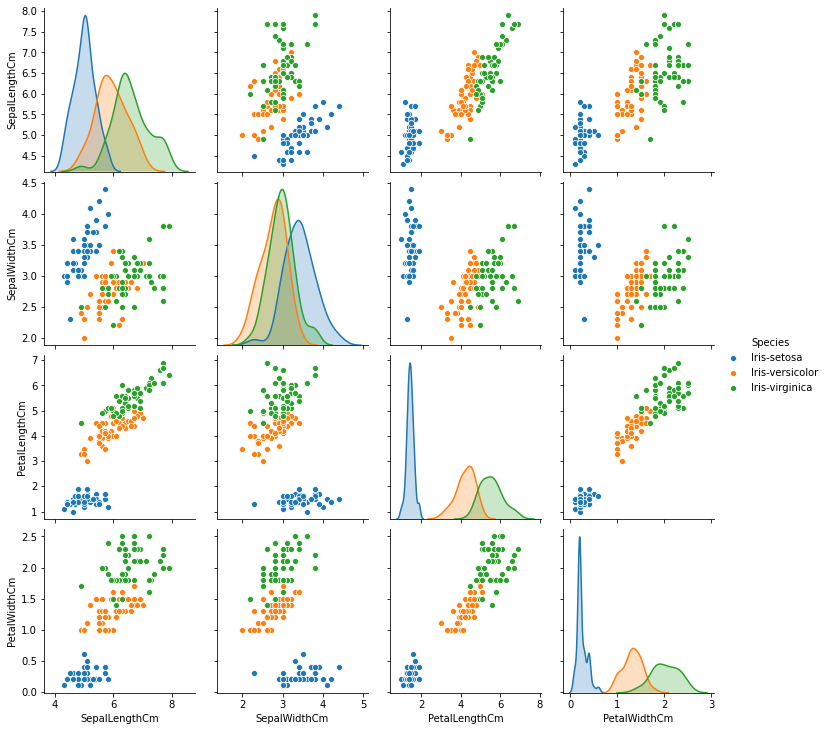

In [278]:
p = sns.pairplot(data, hue='Species')

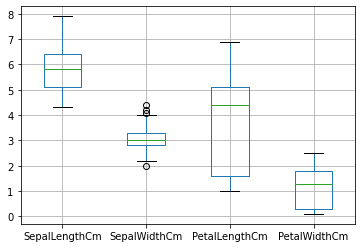

In [279]:
data.boxplot()

#### Removing outliers using IQR

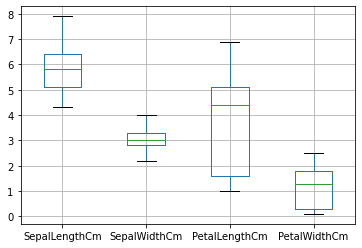

In [204]:
sep_mean = data['SepalWidthCm'].mean()   #3.05733
sep_med = data['SepalWidthCm'].median()   #3.0

# sep_mean, sep_med are similar so we can use either to REPLACE outlier values

for i in ['SepalWidthCm']: # loops through the specified column
    q75 = np.percentile(data['SepalWidthCm'],75) # calculating 75th 
    q25 = np.percentile(data['SepalWidthCm'],25) # and 25th percentiles
    iqr = q75-q25
    up_bound = q75+(1.5*iqr)  # setting upper and lower limits so as to 
    lwr_bound = q25-(1.5*iqr) # replace values that fall outside these limits
    
    data.loc[data[i]<lwr_bound,i] = sep_med # replacing outliers with mean/median instead of
    data.loc[data[i]>up_bound,i] = sep_med  # deleting rows entirely
    
data.boxplot() #removed outliers

## Starting model building

In [280]:
#separating 'Species' column
x = data.iloc[:,:-1] #select all columns but the last one
y = data.iloc[:,-1]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
#Iris-setosa = 0
#Iris-versicolor = 1
#Iris-verginica = 2

### Since our data is in numerical form, we do not need to encode anything else

In [281]:
#splitting data into train, test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [282]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [283]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

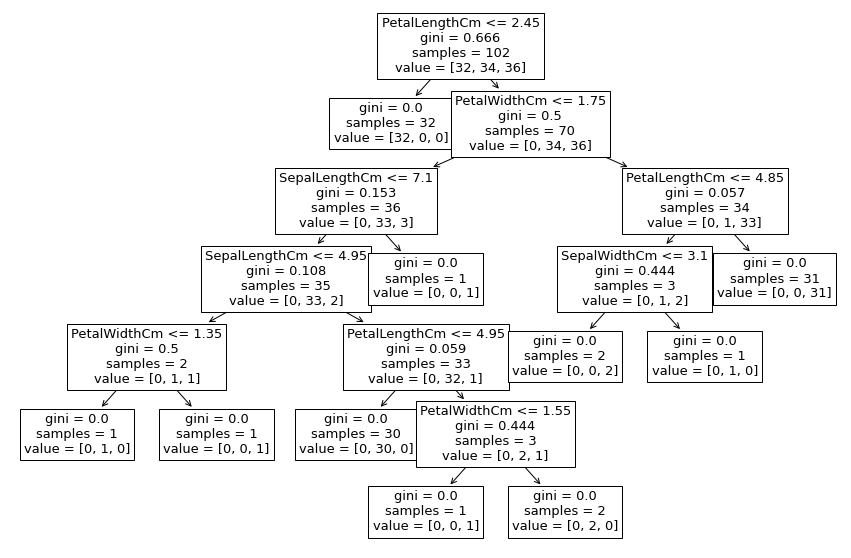

In [284]:
plt.figure(figsize = (15,10))
t =  tree.plot_tree(dt, feature_names = x.columns, fontsize = 13)

In [285]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

### Perfect accuracy score!

# Preparing model for predicting any new data

In [293]:
df = pd.DataFrame({'SepL':[1.1,2,3.9,4,6.1], 'SepW':[2.6,4,2,0.9,3], 
                   'PetL':[3,1,0.8,3.1,2.8], 'PetW':[1.4,2.1,2.7,2,1.4]})
df #dataset with random data for each column

,SepL,SepW,PetL,PetW
0,1.1,2.6,3.0,1.4
1,2.0,4.0,1.0,2.1
2,3.9,2.0,0.8,2.7
3,4.0,0.9,3.1,2.0
4,6.1,3.0,2.8,1.4


In [294]:
pred = dt.predict(df)
pred
# 0 - Setosa, 1 - Versicolor, 2 - Verginica

array([2, 0, 0, 2, 1])